# Start up

# Start up

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from tqdm.notebook import tqdm
import time
import pickle
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.stats import sem

from lifelines import KaplanMeierFitter

from bl_results_plots import km_plots, km_calculate, stats_plot, km_calculateB

In [3]:
from sklearn.metrics import make_scorer, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix, f1_score, recall_score, accuracy_score

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [4]:
FN = './Prognosis_Results/1_year_prediction_no_asma.hdf'
save_name = FN.split('/')[-1][:-4]

pickle_results = dict()

metadata = pd.read_excel('/mnt/c/Users/conor/Git_Projects/PHD/metadata_0206.xlsx')

In [5]:
results = pd.read_hdf(FN, key='Data')
results.index = results.index.set_names('Split', level=0);

In [ ]:
results.index.to_frame()

Split        REF
Split REF                        
0     TMA_1_C11      0  TMA_1_C11
      TMA_1_C11      0  TMA_1_C11
      TMA_1_C11      0  TMA_1_C11
      TMA_1_C11      0  TMA_1_C11
      TMA_1_C11      0  TMA_1_C11
...                ...        ...
90    TMA_2_D4      90   TMA_2_D4
      TMA_2_D4      90   TMA_2_D4
      TMA_2_D4      90   TMA_2_D4
      TMA_2_D4      90   TMA_2_D4
      TMA_2_D4      90   TMA_2_D4

[4216796 rows x 2 columns]

In [ ]:
results.index.to_frame().reset_index(drop=True).merge(metadata.query('TMA in [1,2]'), on = 'REF', how='left')#.query('Split=87')

,Split,REF,Unnamed: 0,TMA,TMA site,gender,Patient_nu,Corrected Site AJCC/UICC,Pathogical Stage,T stage,...,site of recurrence,Last seen/reviewed,Last updated,OUTCOME.updated by,DODvsAlive,DiedvsAlive,lifespan,2year,5year,Alive
0,0,TMA_1_C11,78,1.0,C11,m,3248,FOM,pT2N2bM0,2,...,NaN,NaT,2020-04-01,FGD,Other,Died,1637.0,False,True,False
1,0,TMA_1_C11,78,1.0,C11,m,3248,FOM,pT2N2bM0,2,...,NaN,NaT,2020-04-01,FGD,Other,Died,1637.0,False,True,False
2,0,TMA_1_C11,78,1.0,C11,m,3248,FOM,pT2N2bM0,2,...,NaN,NaT,2020-04-01,FGD,Other,Died,1637.0,False,True,False
3,0,TMA_1_C11,78,1.0,C11,m,3248,FOM,pT2N2bM0,2,...,NaN,NaT,2020-04-01,FGD,Other,Died,1637.0,False,True,False
4,0,TMA_1_C11,78,1.0,C11,m,3248,FOM,pT2N2bM0,2,...,NaN,NaT,2020-04-01,FGD,Other,Died,1637.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216791,90,TMA_2_D4,310,2.0,D4,f,3530,oropharynx,pT2N2bMx,2,...,NaN,2019-03-13,2020-04-01,FGD,Other,Alive,NaN,False,False,False
4216792,90,TMA_2_D4,310,2.0,D4,f,3530,oropharynx,pT2N2bMx,2,...,NaN,2019-03-13,2020-04-01,FGD,Other,Alive,NaN,False,False,False
4216793,90,TMA_2_D4,310,2.0,D4,f,3530,oropharynx,pT2N2bMx,2,...,NaN,2019-03-13,2020-04-01,FGD,Other,Alive,NaN,False,False,False
4216794,90,TMA_2_D4,310,2.0,D4,f,3530,oropharynx,pT2N2bMx,2,...,NaN,2019-03-13,2020-04-01,FGD,Other,Alive,NaN,False,False,False


In [ ]:
metadata.query('TMA in [1,2]')['REF']

0      TMA_1_G13
1       TMA_2_F6
3       TMA_1_E1
4       TMA_2_G9
6      TMA_1_A12
         ...    
302     TMA_2_D4
304     TMA_1_A5
305     TMA_2_D9
307     TMA_1_B4
308     TMA_2_E3
Name: REF, Length: 207, dtype: object

In [ ]:
results.index.to_frame().reset_index(drop=True)

,Split,REF
0,0,TMA_1_C11
1,0,TMA_1_C11
2,0,TMA_1_C11
3,0,TMA_1_C11
4,0,TMA_1_C11
...,...,...
4216791,90,TMA_2_D4
4216792,90,TMA_2_D4
4216793,90,TMA_2_D4
4216794,90,TMA_2_D4


In [57]:
results.index = pd.MultiIndex.from_frame(results.index.to_frame().reset_index(drop=True).merge(metadata, on = 'REF'))

In [ ]:
results

# Bayesian Logistic Regression

F1s = dict()

for _, df in results.groupby('Split'):

    sample = df.sample(10000)

    thr = []

    for t in np.linspace(0.2,0.9,10):

        f1 = f1_score(sample.xs('y_test', axis=1, level=0)
                    ,sample.xs('BLR_Posterior', axis=1, level=0).mean(axis=1)>t)

        thr.append(f1)

    F1s[t] = thr

In [63]:
ts = np.linspace(0.2,0.95,10)

F1 = pd.DataFrame([{t: f1_score(y_true=row.xs('y_test', axis=1, level=0), y_pred=row.xs('BLR_Posterior', axis=1, level=0).mean(axis=1)>t) for t in ts} for i, row in tqdm(results.groupby('Split'))])

In [75]:
F1_accept = F1.index[~(F1<0.05).any(axis=1)]

{'AUC': 'A', 'MCC': 'B', 'Specificity': 'C', 'Sensitivity': 'D', 'PPV': 'E', 'NPV': 'F'}
Plots saved in ./plots/1_year_predictions_no_asma


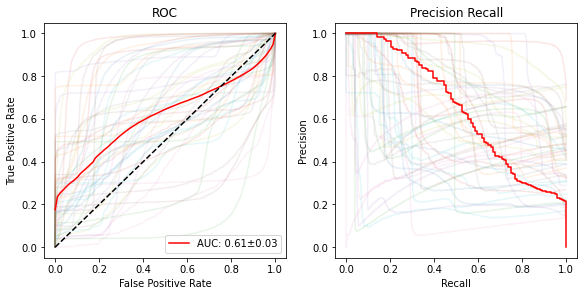

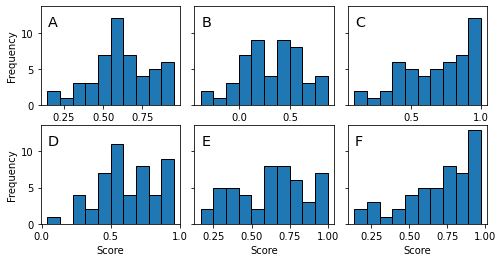

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8,4), constrained_layout = True)

stats = {'AUC':[]
        ,'MCC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []
threshs = []

for idx, row in results.query(f'Split in {list(F1_accept)}').groupby('Split'):
#for idx, row in results.groupby('Split'):
#for idx, row in results.groupby('Split'):

    probs = row.xs('BLR_Posterior', axis=1, level=0).mean(axis=1)
    true = row.xs('y_test', axis=1, level=0)#[:,0]

    if len(np.unique(true)) == 1: continue

    ts = np.linspace(0.2,0.9,20)

    f1 = pd.Series({t: f1_score(y_true=true, y_pred=probs>t) for t in ts})
    best_threshold = f1.idxmax()

    preds = np.array([1 if el > best_threshold else 0 for el in probs])

    fpr, tpr, thresh = roc_curve(true, probs);
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(true, probs)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))

    cm = confusion_matrix(true, preds)
    tn, fp, fn, tp = cm.flatten()

    stats['AUC'].append(roc_auc_score(true, probs))
    #stats['F1'].append(f1_score(y_true=true, y_pred=preds))
    stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    stats['Specificity'].append(tn/(tn+fp))
    stats['Sensitivity'].append(tp/(tp+fn))
    stats['PPV'].append(tp/(tp+fp))
    stats['NPV'].append(tn/(tn+fn))

    threshs.append(best_threshold)

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{sem(stats['AUC']):.2f}")
ax1.plot([0,1],[0,1], ls='--', c='black')

if not os.path.exists(f"./plots/{FN.split('/')[-1][:-4]}/BLR"):

    os.makedirs(f"./plots/{FN.split('/')[-1][:-4]}/BLR")

PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')
plt.savefig(f"./plots/{FN.split('/')[-1][:-4]}/BLR/roc_prec.pdf", bbox_inches='tight')

stats_plot(pd.DataFrame(stats))

#axes = pd.DataFrame(stats).hist(figsize=(12,7), layout=(2,3), sharey = True, w_pad=0, wspace=0);
#[ax.set_ylabel('Frequency') for ax in axes.flatten()]
#[ax.set_xlabel('Score') for ax in axes.flatten()]

plt.savefig(f"./plots/{FN.split('/')[-1][:-4]}/BLR/stats.pdf", bbox_inches='tight')
print(f"Plots saved in ./plots/{FN.split('/')[-1][:-4]}")


pickle_results['Bayesian LR'] = {'ROC Curves': roc_curves, 'PR Curves': prec_rec_curves, 'Stats': stats}

In [20]:
tsi, fsi, ps = km_calculateB(results.query(f'Split in {list(F1_accept)}'), 'survival (months)', 'BLR_Posterior', 'DiedvsAlive')


(62, 2)


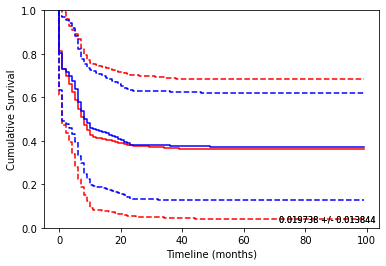

In [21]:
fig = km_plots(tsi, fsi, ps);

In [22]:
pickle_results['Bayesian LR'] = {'ROC Curves': roc_curves
                               , 'PR Curves': prec_rec_curves
                               , 'Stats': stats
                               , 'TSI': tsi
                               , 'FSI': fsi
                               , 'Survival_P': ps}


# Logistic Regression

In [33]:
ts = np.linspace(0.2,0.9,20)

F1 = pd.DataFrame([{t: f1_score(y_true=row.xs('y_test', axis=1, level=0), y_pred=row.xs('LR_Preds', axis=1, level=0).iloc[:,1]>t) for t in ts} for i, row in tqdm(list(results.groupby('Split')))])
F1_accept = F1.index[~(F1==0).any(axis=1).values]

100%|██████████| 72/72 [07:46<00:00,  6.49s/it]


{'AUC': 'A', 'MCC': 'B', 'Specificity': 'C', 'Sensitivity': 'D', 'PPV': 'E', 'NPV': 'F'}
Plots saved in ./plots/1_year_prediction_asma


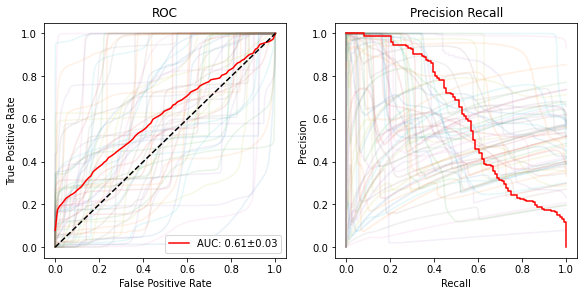

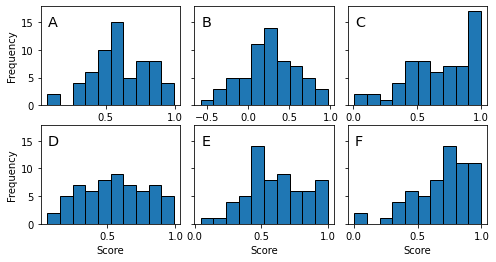

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8,4), constrained_layout = True)

stats = {'AUC':[]
        ,'MCC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []
threshs = []

for idx, row in results.query(f'Split in {list(F1_accept)}').groupby('Split'):
#for idx, row in results.groupby('Split'):

    probs = row.xs('LR_Preds', axis=1, level=0).iloc[:,1]
    true = row.xs('y_test', axis=1, level=0)#[:,0]

    if len(np.unique(true)) == 1: continue

    ts = np.linspace(0.2,0.9,20)

    f1 = pd.Series({t: f1_score(y_true=true, y_pred=probs>t) for t in ts})
    best_threshold = f1.idxmax()

    preds = np.array([1 if el > best_threshold else 0 for el in probs])

    fpr, tpr, thresh = roc_curve(true, probs);
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(true, probs)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))

    cm = confusion_matrix(true, preds)
    tn, fp, fn, tp = cm.flatten()

    stats['AUC'].append(roc_auc_score(true, probs))
    #stats['F1'].append(f1_score(y_true=true, y_pred=preds))
    stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    stats['Specificity'].append(tn/(tn+fp))
    stats['Sensitivity'].append(tp/(tp+fn))
    stats['PPV'].append(tp/(tp+fp))
    stats['NPV'].append(tn/(tn+fn))

    threshs.append(best_threshold)

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{sem(stats['AUC']):.2f}")
ax1.plot([0,1],[0,1], ls='--', c='black')

if not os.path.exists(f"./plots/{FN.split('/')[-1][:-4]}/LR"):

    os.makedirs(f"./plots/{FN.split('/')[-1][:-4]}/LR")

PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')
plt.savefig(f"./plots/{FN.split('/')[-1][:-4]}/LR/roc_prec.pdf", bbox_inches='tight')

stats_plot(pd.DataFrame(stats))

#axes = pd.DataFrame(stats).hist(figsize=(12,7), layout=(2,3), sharey = True, w_pad=0, wspace=0);
#[ax.set_ylabel('Frequency') for ax in axes.flatten()]
#[ax.set_xlabel('Score') for ax in axes.flatten()]

plt.savefig(f"./plots/{FN.split('/')[-1][:-4]}/LR/stats.pdf", bbox_inches='tight')
print(f"Plots saved in ./plots/{FN.split('/')[-1][:-4]}")

In [66]:
tsi, fsi, ps = km_calculate(results.query(f'Split in {list(F1_accept)}'), 'survival (months)', 'LR_Preds', 'DiedvsAlive')

KeyError: 'Requested level (survival (months)) does not match index name (None)'

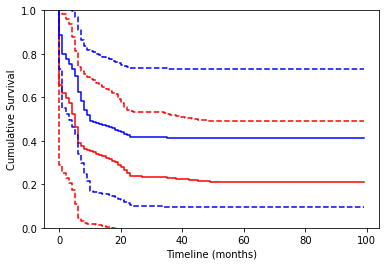

In [ ]:
fig = km_plots(tsi, fsi, ps);

In [ ]:
pickle_results['Normal LR'] = {'ROC Curves': roc_curves
                               , 'PR Curves': prec_rec_curves
                               , 'Stats': stats
                               , 'TSI': tsi
                               , 'FSI': fsi
                               , 'Survival_P': ps}


## Pickle results

In [ ]:
with open(f'./Prognosis_Results/{save_name}.pickle', 'wb') as pickle_file:

    pickle.dump(pickle_results)



# Survival Analysis on whole data

In [ ]:
from bl_plots_new import survival_analysis

In [ ]:
print('HEllo')

# Filtered Bayesian

In [35]:
thres_results = []

for th in np.arange(30,70,5):

    for i, (idx, row) in enumerate(tqdm(list(results.iterrows())), start=1):

        try:
            perc = np.percentile(row['BLR_Posterior'].std(axis=1), th)
            indx = (row['BLR_Posterior'].std(axis=1) < perc).values#[0]

            #indx_s = np.random.randint(0,len(indx), 100)

            preds = row['BLR_Posterior'].iloc[indx, :].mean(axis=1)
            y_true = row['y_test'].values[indx]

            if len(np.unique(true)) ==1: continue

            thres_results.append({'Threshold': th,
                                'AUC': roc_auc_score(y_true, preds),
                                'Bootstrap':i})
        except IndexError as e:

            print('Index')

        except ValueError as e:
            print(e)
            print(f'Error: {th}')

KeyboardInterrupt: 

In [27]:
thresh_results = pd.DataFrame(thres_results)

In [28]:
thresh_results.groupby('Threshold').mean()

,AUC,Bootstrap
Threshold,,
30,0.594305,35.343284
35,0.589444,35.308824
40,0.597705,35.742857
45,0.592263,36.098592
50,0.591830,36.098592
55,0.598015,36.098592
60,0.605415,36.098592
65,0.615054,36.098592


/home/sgcwhitl/miniconda3/envs/pipeline/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/sgcwhitl/miniconda3/envs/pipeline/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/sgcwhitl/miniconda3/envs/pipeline/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
/home/sgcwhitl/miniconda3/envs/pipeline/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/s

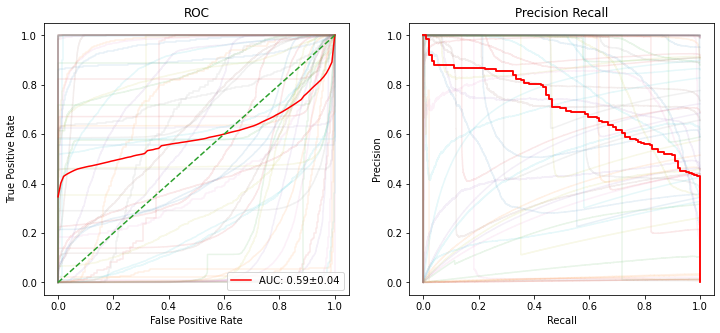

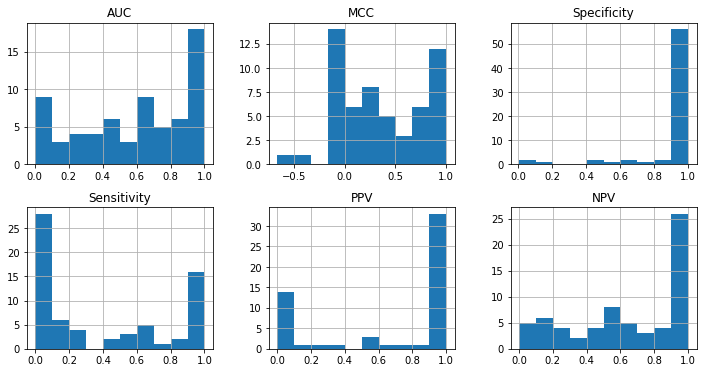

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5), constrained_layout = True)

stats = {'AUC':[]
        ,'MCC':[]
        ,'Specificity':[]
        ,'Sensitivity':[]
        ,'PPV':[]
        ,'NPV':[]}

roc_curves = []
prec_rec_curves = []

#for idx, row in results.loc[~(F1==0).any(axis=1)].iterrows():
for idx, row in results.iterrows():
    
    # Calculate nth percentile of standard deviations for each prediction
    perc = np.percentile(row['BLR_Posterior'].std(axis=1), 30)

    # Filter based on the percentile value
    indx = np.where(row['BLR_Posterior'].std(axis=1) < perc)[0]

    # Only take predictions and true values for those with the std dev
    # less than that given by the percentile value
    preds = row['BLR_Posterior'].iloc[indx, :].mean(axis=1)
    y_true = row['y_test'].values[indx]

    # Need to check if 0.5 is a suitable value
    predst = np.array([1 if el > 0.5 else 0 for el in preds])

    try:
        fpr, tpr, thresh = roc_curve(y_true, preds);

    except IndexError as e:

        print('index')
        continue
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1, alpha=0.1)

    roc_curves.append(np.interp(np.linspace(0,1,100), fpr, tpr))

    #ax2.plot(fpr_u, tpr_u, label='unweighted')
    ax1.set_title("ROC")

    prec, recall, _ = precision_recall_curve(y_true, preds)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2, alpha=0.1)
    ax2.set_title("Precision Recall")
    prec_rec_curves.append(np.interp(np.linspace(0,1,100), prec, recall))


    cm = confusion_matrix(y_true, predst)
    try:
        tn, fp, fn, tp = cm.flatten()
    except:
        continue

    try:
        stats['AUC'].append(roc_auc_score(y_true, preds))
        stats['Specificity'].append(tn/(tn+fp))
        stats['Sensitivity'].append(tp/(tp+fn))
        stats['PPV'].append(tp/(tp+fp))
        stats['NPV'].append(tn/(tn+fn))
        stats['MCC'].append(((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))

    except:
        pass

roc_curves=np.array(roc_curves)
prec_rec_curves=np.array(prec_rec_curves)

#fpr_w, tpr_w, thresh_w = roc_curve(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values));
#auc = roc_auc_score(np.concatenate(results['y_test'].values), np.concatenate(results['LR_preds'].values))
RocCurveDisplay(fpr=np.linspace(0,1,100), tpr=np.nanmean(roc_curves, axis=0)).plot(ax=ax1, color='r', label=f"AUC: {np.mean(stats['AUC']):.2f}±{sem(stats['AUC']):.2f}")
PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')


ax1.plot([0,1],[0,1], ls='--')

if not os.path.exists(f"./plots/New/{FN.split('/')[-1][:-7]}/BLR_f"):

    os.makedirs(f"./plots/New/{FN.split('/')[-1][:-7]}/BLR_f")

PrecisionRecallDisplay(recall=np.linspace(0,1,100), precision=np.nanmean(prec_rec_curves, axis=0)).plot(ax=ax2, color='r')
plt.savefig(f"./plots/New/{FN.split('/')[-1][:-7]}/BLR_f/roc_prec.pdf", bbox_inches='tight')

#pd.DataFrame(stats).hist(figsize=(12,6), layout=(2,3));
#plt.savefig(f"./plots/New/{FN.split('/')[-1][:-7]}/BLR_f/stats.pdf", bbox_inches='tight')

stats_plot(pd.DataFrame(stats))

plt.savefig(f"./plots/{FN.split('/')[-1][:-7]}/BLR_f/stats.pdf", bbox_inches='tight')
print(f" plots saved in ./plots/{FN.split('/')[-1][:-7]}/BLR_f/stats.pdf")
